<a href="https://colab.research.google.com/github/natsakh/Data-Analysis/blob/main/Pr_2/2_4_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display="text")

In [41]:
# 1. Завантаження MNIST
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # нормалізація
y = y.astype(int)

In [42]:
# Інформація про датасет
print("Розмір датасету:", X.shape)       # (70000, 784)
print("Кількість зображень:", len(X))   # 70000
print("Кількість ознак (пікселів):", X.shape[1])  # 784 = 28*28
print("Унікальні класи:", np.unique(y)) # 0–9

Розмір датасету: (70000, 784)
Кількість зображень: 70000
Кількість ознак (пікселів): 784
Унікальні класи: [0 1 2 3 4 5 6 7 8 9]


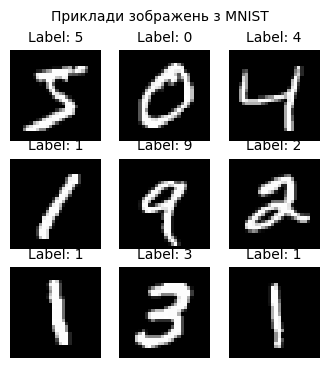

In [43]:
# 2. Візуалізація перших 9 зображень
fig, axes = plt.subplots(3, 3, figsize=(4, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y[i]}", fontsize=10)
    ax.axis("off")
plt.suptitle("Приклади зображень з MNIST", fontsize=10)
plt.show()

In [44]:
# 3. Вибираємо менший піднабір для швидкого навчання
X_small, _, y_small, _ = train_test_split(X, y, train_size=5000, random_state=42)

In [45]:
# 4. Навчання Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_small, y_small)

RandomForestClassifier(n_estimators=50, random_state=42)

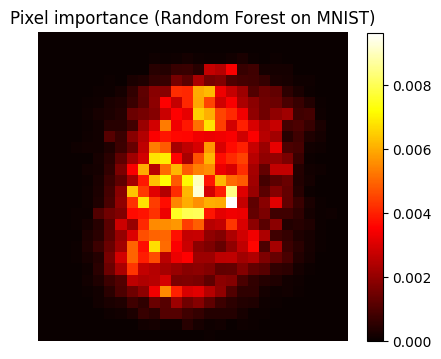

In [46]:
#Важливість ознак (reshape в 28x28)
importances = rf.feature_importances_.reshape(28, 28)
#rf.feature_importances_ - повертає масив numpy.ndarray
#це масив довжини n_features, де кожне число означає важливість конкретної ознаки (feature) для побудови дерев у лісі
#усі важливості нормалізуються так, щоб їх сума дорівнювала 1.0

# Візуалізація карти важливості пікселів
plt.figure(figsize=(5, 5))
plt.imshow(importances, cmap="hot", interpolation="nearest")
plt.colorbar(shrink=0.8)
plt.title("Pixel importance (Random Forest on MNIST)", fontsize = 12)
plt.axis("off")
plt.show()